The deliverables for Unsupervised Learning project can be found below:

Video Link :

https://youtu.be/w5QH4oOOW_U

GitHub Repository:

https://github.com/kmadhu181090/MS-AI/tree/main/Pathway%20Machine%20Learning%3A%20Theory%20%26%20Hands-On%20Practice%20with%20Python%20Specialization/CSCA%205632%3A%20Unsupervised%20Algorithms%20in%20Machine%20Learning



# **Project Description:**

Online Retail dataset is taken from the kaggle wherein they have taken the dataset from UCI Irvine Machine learning repository.

This dataset contains transactional data which contains all the transactions between 01/12/2010 to 09/12/2011 for a UK based and registered non-store online retail.It has retail information about occasional gifts.Most of the customers involved are wholesalers.

**Number of rows:** 541909
**Number of Columns:** 8

**File Size:** 22.6 MB

**Variables/Data types/Description:**

1.InvoiceNo: Categorical - a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2.StockCode: Categorical -  a 5-digit integral number uniquely assigned to each distinct product.

3.Description: Categorical - Product Name

4.Quantity: Numeric - The quantities of each product (item) per transaction.

5.InvoiceDate: Numeric - Invoice Date and time.the day and time when each transaction was generated.

6.UnitPrice: Numeric - Unit price. Numeric, Product price per unit in sterling.

7.CustomerID: Float - Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8.Country: Object - the name of the country where each customer resides.

**Citation:**

Seo, J. S. (2015). Online Retail Data Set from UCI ML repo. Kaggle.com. https://doi.org/10.1057/dbm.2012.17)

Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

Source:

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK

**Main Goal of the project:**

1.   Understand Customer purchasing behaviour using RFM strategy (Recency/Frequency/Monetary)
2.   Identify distinct customer groups using k-means clustering , HDBSCAN/DBSCAN and hierarchical clustering algorithms.
3.   Detect Outliers (Customers with unusual purchasing patterns)
4.   Providing actionable insights for the marketing teams.


**Steps:**

1.Project Description

2.Data Loading and Inspection

3.Data Cleaning and Preprocessing(Stage1)
 - Check for Nulls
 - Remove CustomerID which has max Nulls
 - Check datatypes
 - Change the CustomerID datatype to int
 - Remove Cancelled invoices

4.Exploratory Data Analysis
 - Check Correlations
 - Top 10 Countries by Revenue
 - Top 10 products by quantity
 - Time Series Analysis and Visulaization
 - Time Series of top selling products
 - Normalized Monthly Revenue of top selling products
 - EDA Summary

5.Feature Engineering
 - RFM
 - Adding columns to RFM dataframe to improve clustering

6.Feature Scaling (Stage2 Preprocessing)

7.Unsupervised Algorithms

a)Dimensionality Reduction
 - PCA
 - UMAP

b)Clustering/Segmentation (With Hyperparameter Tuning)

 - K-Means
 - DBSCAN
 - Hierarchical Clustering (Agglomerative)
 - GMM Clustering
 - HDBSCAN

 c)Market Basket Analysis (Is in a separate notebook)

 - FP Growth
 - Association Rules

 8.Conclusion

 9.Things to Improve

 10.References

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data Loading and Data Inspection

In [2]:
import pandas as pd
#filepath="content/sample_data/Online Retail.xlsx"
df = pd.read_excel("Online Retail.xlsx")

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
import hdbscan


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Data Cleaning and Preprocessing (Stage 1 )**

In [10]:
#Handle Missing Values - Check for Nulls

missing_counts = df.isnull().sum()
print(missing_counts)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


We have 135080 missing customet ids and 1454 descriptions. The missing descriptions might be associated with the missing customer ids.Lets drop the customer ids first.For RFM, generally the rows are dropped.

In [11]:
# Remove Customer Id column with maximum Nulls
df = df.dropna(subset = ['CustomerID'])

In [12]:
missing_counts = df.isnull().sum()
print(missing_counts)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [13]:
df.shape

(406829, 8)

Once the null customer ids are removed the dataframe has 406829 rows and 8 columns.

In [14]:
#Check for datatypes
df.dtypes



,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


The datatype of CustomerId is float. It should be changed to integer.

In [15]:
df['CustomerID'].astype(int)

,CustomerID
0,17850
1,17850
2,17850
3,17850
4,17850
...,...
541904,12680
541905,12680
541906,12680
541907,12680


Creating a new column 'TotalPrice1' to see from which country the maximum revenue comes from.From the raw data, it can be seen that maximum revenue comes from UK.

In [16]:
print(df[df['InvoiceNo'].astype(str).str.startswith('C')]['InvoiceNo'])
df[df['InvoiceNo'].astype(str).str.startswith('C')]


141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 8905, dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


8095 rows have invoices starting with the letter 'C' which means they are cancelled and they should be removed.For some transactions, the quantity and UnitPrice are negative which should be removed.

In [17]:
#Print and display the invoice number starting with 'C'

cancelled_invoices = df[df['InvoiceNo'].astype(str).str.startswith('C')]['InvoiceNo'].unique()
cancelled_count = df['InvoiceNo'].astype(str).str.startswith('C').sum()
print(cancelled_invoices)
print('Total Canceleld Invoices:',cancelled_count)

['C536379' 'C536383' 'C536391' ... 'C581499' 'C581568' 'C581569']
Total Canceleld Invoices: 8905


In [18]:
#Remove Cancelled Invoices
#Transactions with InvoiceNumber starting with 'C'are cancellations .They can be dropped.

df_cleaned = df[~df['InvoiceNo'].astype(str).str.startswith('C')].copy()
df_cleaned = df_cleaned[(df_cleaned['Quantity']>0) & (df_cleaned['UnitPrice']>0)]
df_cleaned.shape

(397884, 8)

In [19]:
print("Number of Unique Customers:",df_cleaned['CustomerID'].nunique())

Number of Unique Customers: 4338


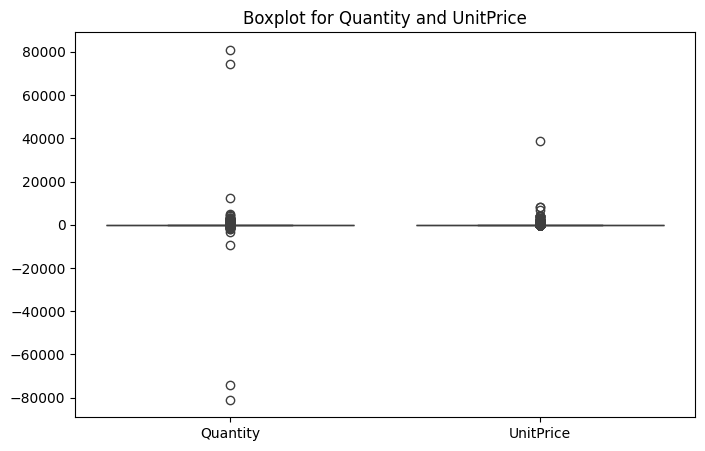

In [20]:
#Check for Outliers

plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Quantity','UnitPrice']])
plt.title('Boxplot for Quantity and UnitPrice')
plt.show()

In [21]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Exploratory Data Analysis **

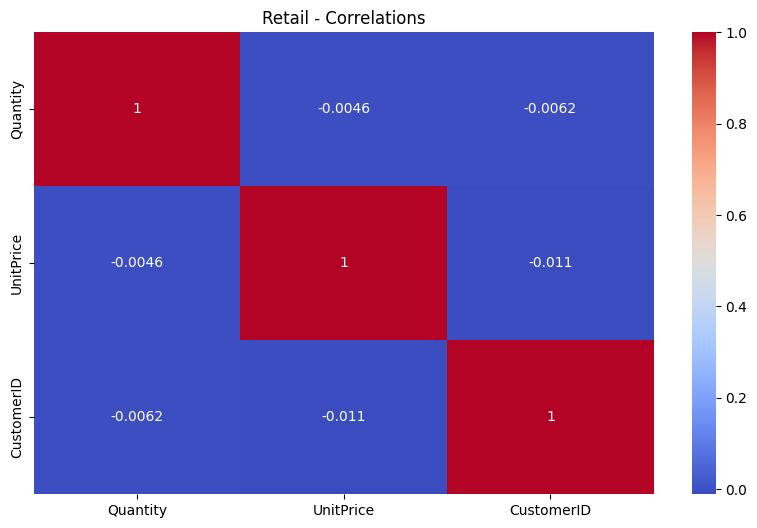

In [22]:
#Check Correlations - HeatMap

plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Retail - Correlations")
plt.show()


Quantity vs UnitPrice - Negatively correlated since cheaper times can be bought in bulk vs expensive ones in small quantities.Similarly for UnitPrice vs TotalPrice

In [47]:
#Displaying the top 10 countries after removing the cancelled invoices
df_cleaned['Total Price'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
top_countries = df_cleaned.groupby('Country')['Total Price'].sum().sort_values(ascending=False).head(12)
print(top_countries)
df_cleaned.to_csv("df_cleaned.csv",index=False)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Japan               37416.370
Norway              36165.440
Name: Total Price, dtype: float64


Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Total Price, dtype: float64


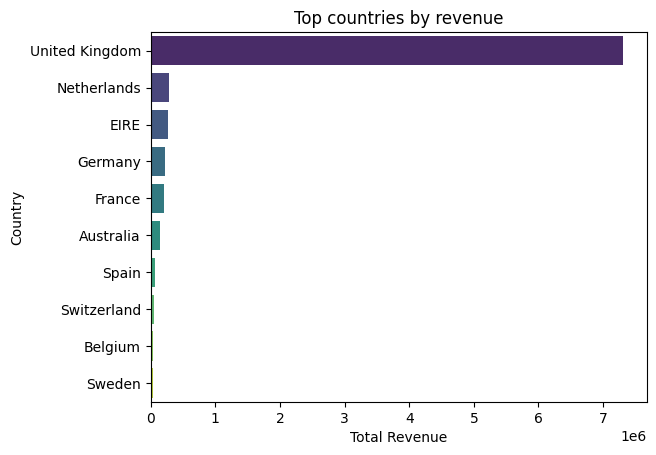

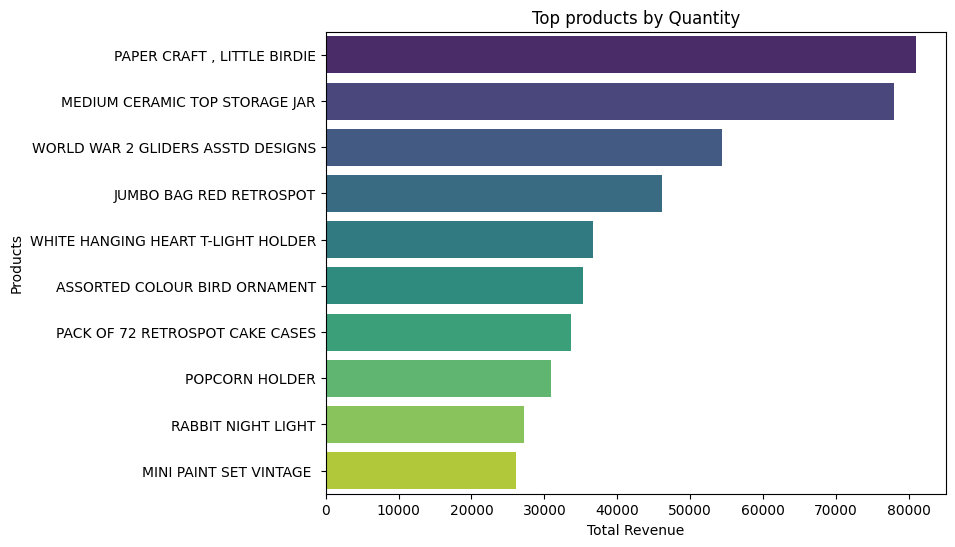

In [24]:
#Visualization - Top Performers
#Top Countries by Revenue

top_countries = df_cleaned.groupby('Country')['Total Price'].sum().sort_values(ascending=False).head(10)
print(top_countries)
sns.barplot(x=top_countries.values,y = top_countries.index,palette='viridis')
plt.title("Top countries by revenue")
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

#Top products by Quantity

top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_products.values,y = top_products.index,palette='viridis')
plt.title("Top products by Quantity")
plt.xlabel('Total Revenue')
plt.ylabel('Products')
plt.show()


In [25]:
#Time Series Analysis - Date has to be set as an index
#Create a New Column - Revenue (Quantity * Unit Price)

df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned .set_index('InvoiceDate')


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total Price,Revenue
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,20.34
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,16.60


In [26]:
#Time Series Analysis
#Grouping the sales based on Dya,Months and Weeks

sales_by_day = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.to_period('D'))['Total Price'].sum()
sales_by_week = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.to_period('W'))['Total Price'].sum()
sales_by_month = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.to_period('M'))['Total Price'].sum()

#print("sales_by_day",sales_by_day.head())
print(sales_by_day.head())
print(sales_by_week.head())
print(sales_by_month.head())

InvoiceDate
2010-12-01    46376.49
2010-12-02    47316.53
2010-12-03    23921.71
2010-12-05    31771.60
2010-12-06    31215.64
Freq: D, Name: Total Price, dtype: float64
InvoiceDate
2010-11-29/2010-12-05    149386.33
2010-12-06/2010-12-12    213447.72
2010-12-13/2010-12-19    163770.73
2010-12-20/2010-12-26     46109.11
2011-01-03/2011-01-09    114865.27
Freq: W-SUN, Name: Total Price, dtype: float64
InvoiceDate
2010-12    572713.890
2011-01    569445.040
2011-02    447137.350
2011-03    595500.760
2011-04    469200.361
Freq: M, Name: Total Price, dtype: float64


In [27]:
print(sales_by_day.index)
print(sales_by_day.index.to_timestamp())

PeriodIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-05',
             '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09',
             '2010-12-10', '2010-12-12',
             ...
             '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
             '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
             '2011-12-08', '2011-12-09'],
            dtype='period[D]', name='InvoiceDate', length=305)
DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-05',
               '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09',
               '2010-12-10', '2010-12-12',
               ...
               '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
               '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
               '2011-12-08', '2011-12-09'],
              dtype='datetime64[ns]', name='InvoiceDate', length=305, freq=None)


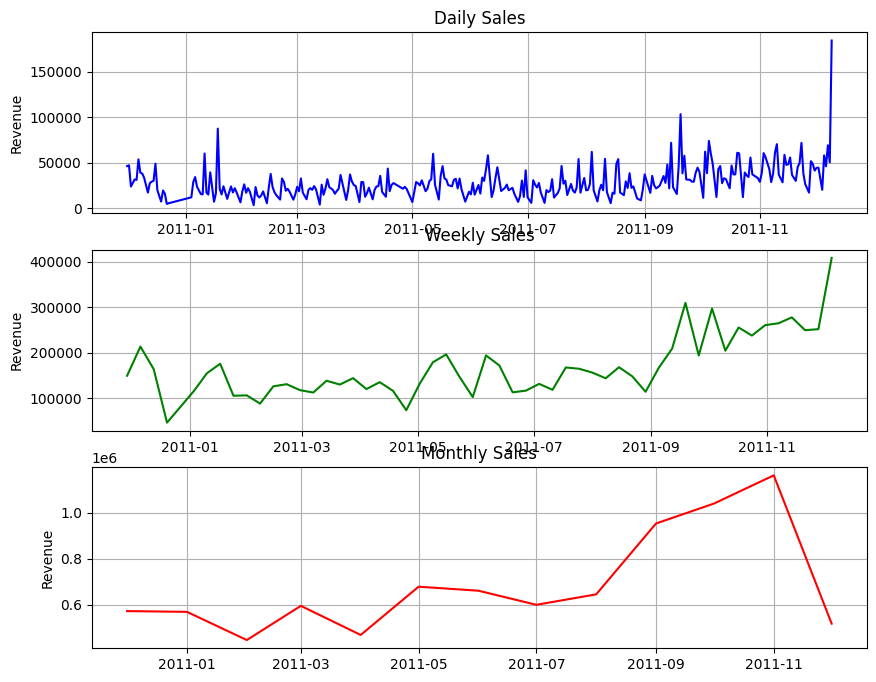

In [28]:
#Time Series Visualization

sales_by_day.index = sales_by_day.index.to_timestamp()
sales_by_week.index = sales_by_week.index.to_timestamp()
sales_by_month.index = sales_by_month.index.to_timestamp()

fig,axes = plt.subplots(3,1,figsize=(10,8),sharex=False)

axes[0].plot(sales_by_day.index,sales_by_day.values,color='blue')
axes[0].set_title('Daily Sales')
axes[0].set_ylabel('Revenue')
axes[0].grid(True)

axes[1].plot(sales_by_week.index,sales_by_week.values,color='green')
axes[1].set_title('Weekly Sales')
axes[1].set_ylabel('Revenue')
axes[1].grid(True)

axes[2].plot(sales_by_month.index,sales_by_month.values,color='red')
axes[2].set_title('Monthly Sales')
axes[2].set_ylabel('Revenue')
axes[2].grid(True)

In the weekly sales, we can see that the trend is increasing after November but its decreasing in the monthly sales after November.

This is because in the intial 2 weeks of december there wont be much spending compared to previous months (blackfrirday and cyberday deals) and as sales only increases in the last 2 weeks of december due to christmas, there is spike in the weekly chart after November.

In the monthly chart , since its an average of the whole month, december average will be less compared to November average since in the first 2 weeks of december, the revenue is low.

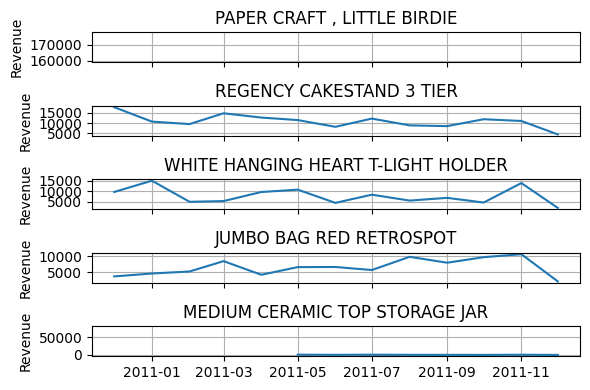

In [29]:
#Time Series of top selling products

monthly_product_sales = df_cleaned.groupby([df_cleaned['InvoiceDate'].dt.to_period('M'),'Description'])['Revenue'].sum().reset_index()

#Pivot table
monthly_product_sales_pivot = monthly_product_sales.pivot(index='InvoiceDate',columns='Description',values='Revenue')

#Top revenue per product
top_products = df_cleaned.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(5).index

#Filter time series for top products
top_products_ts = monthly_product_sales_pivot[top_products]

fig, axes = plt.subplots(len(top_products_ts.columns), 1, figsize=(6, 4), sharex=True)

for i, product in enumerate(top_products_ts.columns):
    axes[i].plot(top_products_ts.index.to_timestamp(), top_products_ts[product])
    axes[i].set_title(product)
    axes[i].set_ylabel("Revenue")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


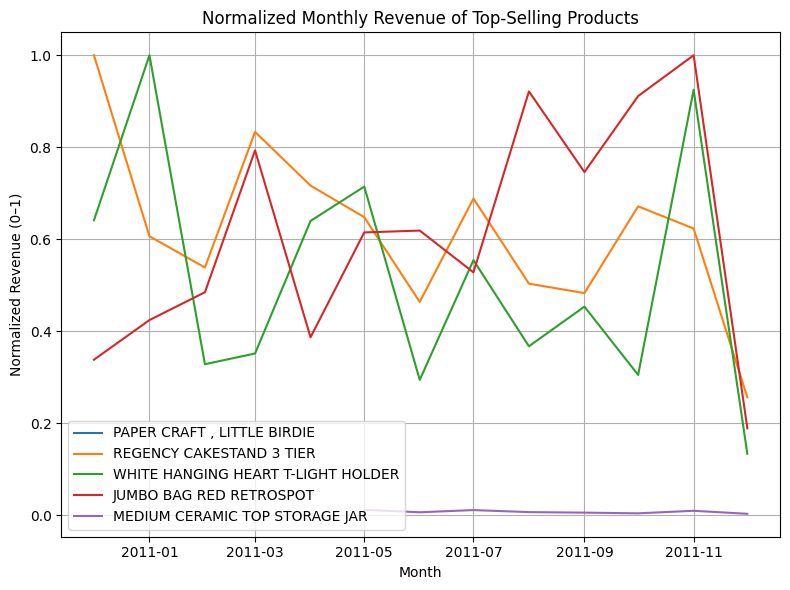

In [30]:
#Normalized Monthly Revenue of top selling products

normalized_ts = top_products_ts.divide(top_products_ts.max())

plt.figure(figsize=(8,6))
for product in normalized_ts.columns:
    plt.plot(normalized_ts.index.to_timestamp(), normalized_ts[product], label=product)

plt.title("Normalized Monthly Revenue of Top-Selling Products")
plt.xlabel("Month")
plt.ylabel("Normalized Revenue (0–1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the above plot, we can see that most of the products show spikes in November/December due to holiday shopping.The White hanging heart t-light holder and jumbo bag red retrospot maintain stable performance throughout the year.

**EDA Summary:**

 - **Check Correlations**
 - **Top 10 Countries by Revenue**
 - **Top 10 products by quantity**
 - **Time Series Analysis and Visulaization**
 - **Time Series of top selling products**
 - **Normalized Monthly Revenue of top selling products**

# **Feature Engineering**

**1.RFM**

Next we have to perform RFM (Recency,Frequency and Monetary) which is a customer segmentation technique used in marketing and analytics to identify the customer groups based on behaviour.

RFM is based on the fact that



*   Customers who bought the items recently are most likely to buy again(R)
*   Customers who buy frequently are more loyal.(F)
*   Customers who spend more money are more valuable.(M)

Based on this we can prioritize marketing strategies.

In [31]:
#Recency Calculation
#Calculate the most recent date(Max purchase date - Most recent date) for each customer id

df_recency = df_cleaned.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID','LastPurchaseDate']
df_recency['LastPurchaseDate'] = df_recency['LastPurchaseDate'].dt.date
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['recency'] = df_recency['LastPurchaseDate'].apply(lambda x: recent_date - x)
df_recency.head()

,CustomerID,LastPurchaseDate,recency
0,12346.0,2011-01-18,325 days
1,12347.0,2011-12-07,2 days
2,12348.0,2011-09-25,75 days
3,12349.0,2011-11-21,18 days
4,12350.0,2011-02-02,310 days


In [32]:
#Feature Engineering
#RFM Analysis - Recency is calculated as snapshot date = Max Invoice date + 1. This is because for customers who have their
#transactios with max date with Invoicedate = Max date, their recency will be 0.So 1 is added to the snapshotdate.

snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1) #Reference date to calculate recency

#aggregates data
rfm = df_cleaned.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,'InvoiceNo':'nunique','Revenue':'sum'})
#rename
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Revenue':'Monetary'},inplace=True)


In [33]:
#qcut - Split into quartiles and label

rfm['R'] = pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5]).astype(int) #adding rank method to avoid value error and pandas knows where to exactly cut the values
rfm['M'] = pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5]).astype(int)
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)


The above code uses panda's qcut to divide Recency,Frequency and Monetary values into 5 equal sized groups and assign scores from 1 to 5.

Recency is labelled in reverse because lower recency means better customer.

Frequency uses rank method to avoid ties so pandas can split the data evenly into qunatiles.

RFM segment combines all 3 scores of Recency,Frequency and Monetary.

RFM score sums all the R , F and M values to create a single numeric value that represents each customer.

In [34]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,7,4310.00,5,5,5,555,15
12348.0,75,4,1797.24,2,4,4,244,10
12349.0,19,1,1757.55,4,1,4,414,9
12350.0,310,1,334.40,1,1,2,112,4


In [35]:
print(rfm)

            Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
CustomerID                                                              
12346.0         326          1  77183.60  1  1  5         115          7
12347.0           2          7   4310.00  5  5  5         555         15
12348.0          75          4   1797.24  2  4  4         244         10
12349.0          19          1   1757.55  4  1  4         414          9
12350.0         310          1    334.40  1  1  2         112          4
...             ...        ...       ... .. .. ..         ...        ...
18280.0         278          1    180.60  1  2  1         121          4
18281.0         181          1     80.82  1  2  1         121          4
18282.0           8          2    178.05  5  3  1         531          9
18283.0           4         16   2094.88  5  5  5         555         15
18287.0          43          3   1837.28  3  4  4         344         11

[4338 rows x 8 columns]


In [36]:
#Only For Visualization the below function based on RFM dataframe is added
#add column 'Segments' to divide the customers based on the below condition

def segment_customer(row):
  if row['RFM_Score'] >= 12:
    return 'Champions'
  elif row['RFM_Score'] >= 9:
    return 'Loyal'
  elif row['RFM_Score'] >= 6:
    return 'Potential'
  else:
    return 'At Risk'

rfm['Segment'] = rfm.apply(segment_customer,axis=1)
print(rfm.head())


            Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
CustomerID                                                                 
12346.0         326          1  77183.60  1  1  5         115          7   
12347.0           2          7   4310.00  5  5  5         555         15   
12348.0          75          4   1797.24  2  4  4         244         10   
12349.0          19          1   1757.55  4  1  4         414          9   
12350.0         310          1    334.40  1  1  2         112          4   

              Segment  
CustomerID             
12346.0     Potential  
12347.0     Champions  
12348.0         Loyal  
12349.0         Loyal  
12350.0       At Risk  


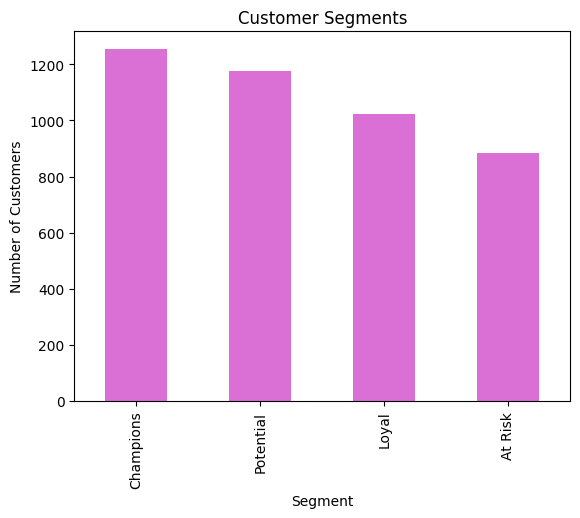

In [37]:
rfm['Segment'].value_counts().plot(kind='bar', color='orchid')
plt.title("Customer Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

This above chart shows how the customers are distributed across four behavioral segments derived from RFM.

Champions - Most Recent , Frequent and High spending Customers
Potential - Moderate recency,frequency and possible spending a bit more.
Loyal - Frequent buyers,possibly with moderate spend.
At Risk - High recency,low frequency or spend.

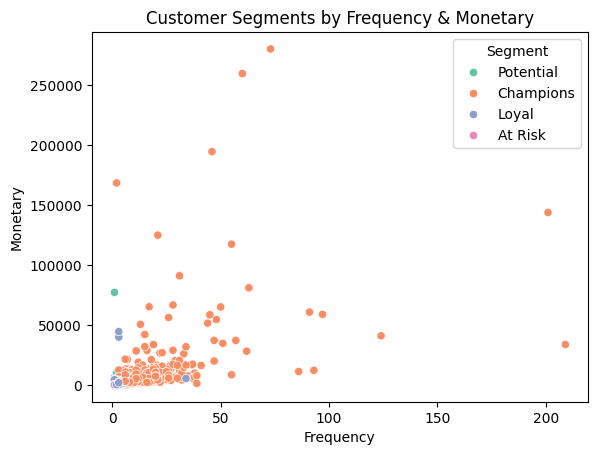

In [38]:
sns.scatterplot(x='Frequency', y='Monetary',
                hue='Segment', data=rfm, palette='Set2')
plt.title("Customer Segments by Frequency & Monetary")
plt.show()


From the above 2 plots , we can see that the champion customers are high compared to the other 3 categories.Champions are the customers whose RFM score >= 12.

RFM segment and RFM score is added only for visualization purpose.These columns can be dropped later. They are only derived features and not behavioural variables.Also,Clustering needs raw numerical features.

**2.Adding columns to RFM dataframe to improve clustering**

In the below code, the following columns are to be added to rfm dataframe to improve the clustering algorithm.

ProductVariety - Total number of unique products purchased by the customer

AverageBasketQuantity - Average quantity for each customer

Country from df_cleaned dataframe

Averagedistinctproductspercustomer

AverageUnitPrice per customer

AverageItemQuantity per customer

In [39]:
rfm['ProductVariety'] = df_cleaned.groupby(df_cleaned['CustomerID'])['StockCode'].nunique()

basket_quantity = df_cleaned.groupby(['CustomerID','InvoiceNo'])['Quantity'].sum()
rfm['AverageBasketQuantity'] = basket_quantity.groupby('CustomerID').mean()

rfm['Country'] = df_cleaned.groupby(df_cleaned['CustomerID']).agg({'Country':'first'})

rfm['AverageUnitPrice'] = df_cleaned.groupby(df_cleaned['CustomerID'])['UnitPrice'].mean()

rfm['AverageItemQuantity'] = df_cleaned.groupby(df_cleaned['CustomerID'])['Quantity'].mean()

uniqueprodctpercustomer = df_cleaned.groupby(['CustomerID','InvoiceNo'])['StockCode'].nunique()
rfm['Averagedistinctproductspercustomer'] = uniqueprodctpercustomer.groupby('CustomerID').mean()

rfm = rfm.drop(columns = ['R','F','M','RFM_Segment','RFM_Score','Segment'],axis = 1)

rfm.head()

,Recency,Frequency,Monetary,ProductVariety,AverageBasketQuantity,Country,AverageUnitPrice,AverageItemQuantity,Averagedistinctproductspercustomer
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,74215.000000,United Kingdom,1.040000,74215.000000,1.00
12347.0,2,7,4310.00,103,351.142857,Iceland,2.644011,13.505495,26.00
12348.0,75,4,1797.24,22,585.250000,Finland,5.764839,75.516129,6.75
12349.0,19,1,1757.55,73,631.000000,Italy,8.289041,8.643836,73.00
12350.0,310,1,334.40,17,197.000000,Norway,3.841176,11.588235,17.00


**Visualization of Newly added Features**

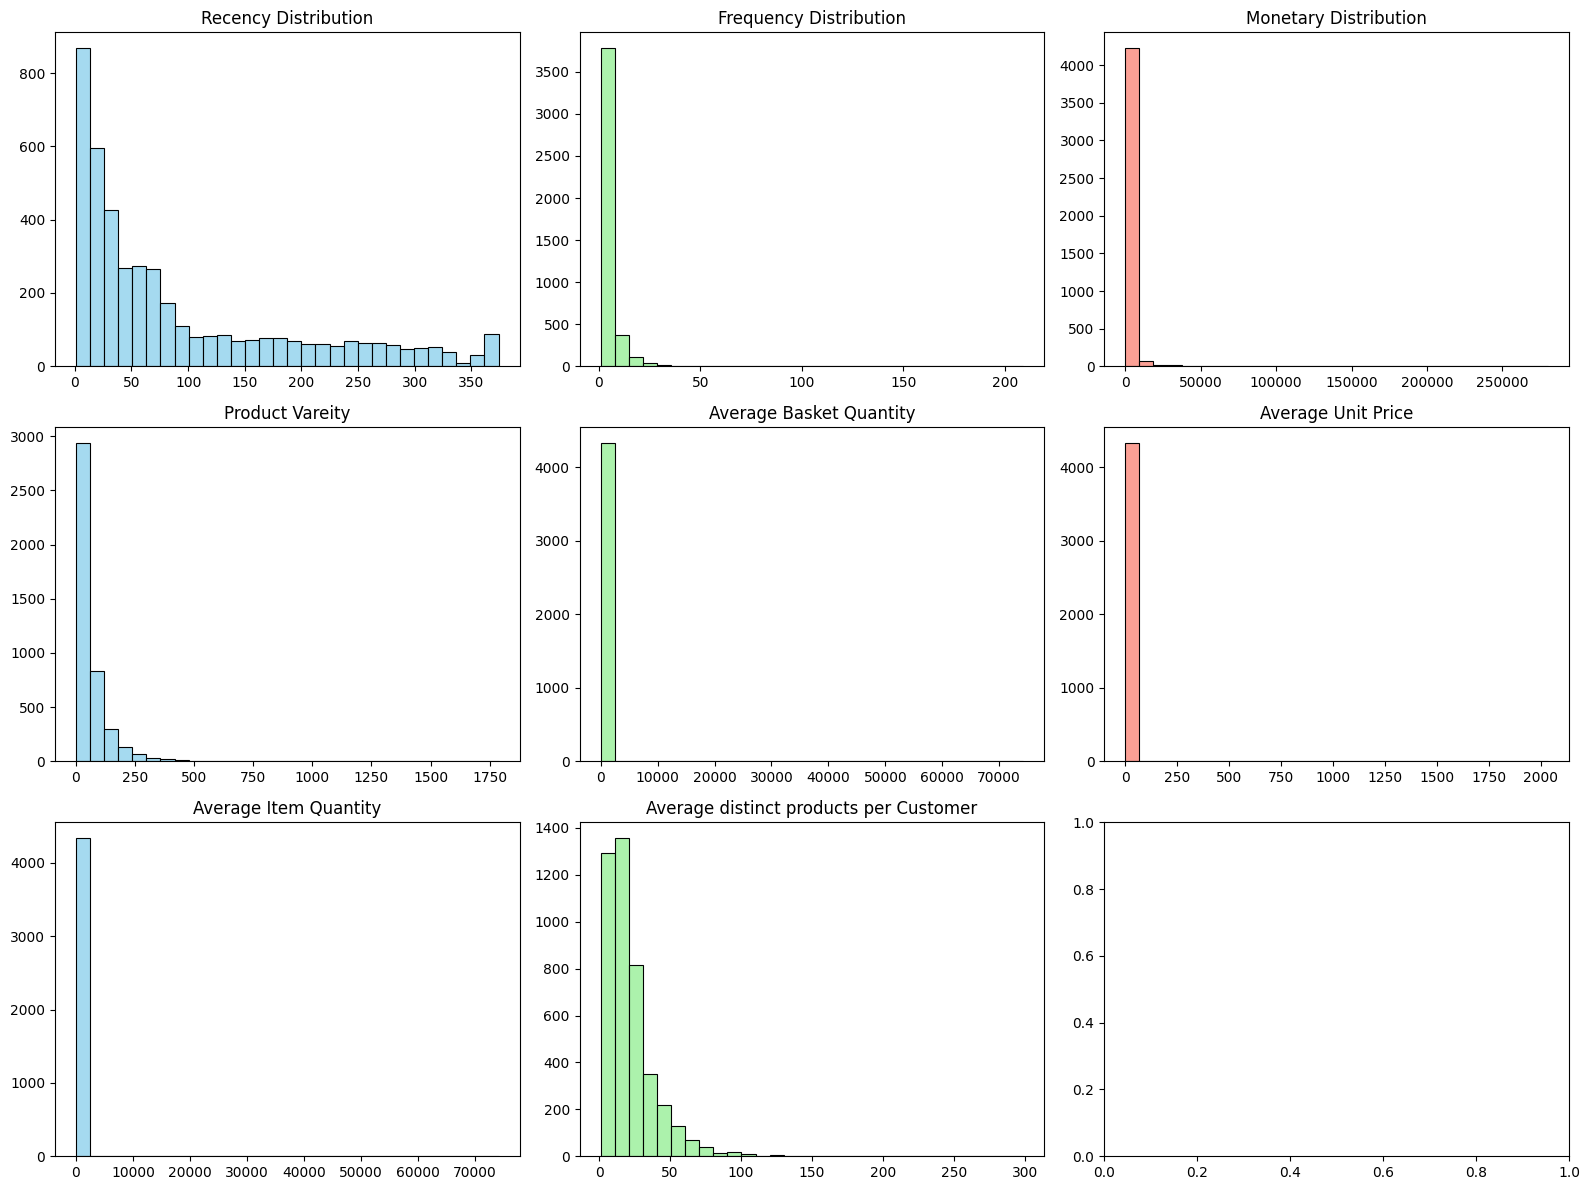

In [40]:
#Distribution of features

fig, axes = plt.subplots(3,3, figsize=(16,12))

#axes = axes.flatten()

sns.histplot(rfm['Recency'], bins=30, ax=axes[0][0], color='skyblue')
axes[0][0].set_title("Recency Distribution")

sns.histplot(rfm['Frequency'], bins=30, ax=axes[0][1], color='lightgreen')
axes[0][1].set_title("Frequency Distribution")

sns.histplot(rfm['Monetary'], bins=30, ax=axes[0][2], color='salmon')
axes[0][2].set_title("Monetary Distribution")

sns.histplot(rfm['ProductVariety'], bins=30, ax=axes[1][0], color='skyblue')
axes[1][0].set_title("Product Vareity")

sns.histplot(rfm['AverageBasketQuantity'], bins=30, ax=axes[1][1], color='lightgreen')
axes[1][1].set_title("Average Basket Quantity")

sns.histplot(rfm['AverageUnitPrice'], bins=30, ax=axes[1][2], color='salmon')
axes[1][2].set_title("Average Unit Price")

sns.histplot(rfm['AverageItemQuantity'], bins=30, ax=axes[2][0], color='skyblue')
axes[2][0].set_title("Average Item Quantity")

sns.histplot(rfm['Averagedistinctproductspercustomer'], bins=30, ax=axes[2][1], color='lightgreen')
axes[2][1].set_title("Average distinct products per Customer")

for row in axes:
  for ax in row:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


In the above graph for,
 **Recency**,tall bar indicates that many customers have bought items very recently which is a good sign for business.For recency above 100 , the bars are very low which indicates there are almost same number of customers who are have made a purcahse between 100 days and almost a year.

 **Frequency** , tall bars indicate that many shoppers are majority of the customers have only shopped once or twice which is an issue for the business.

** Monterary:** , Most of the customers have spent very little amount.Log reduces dominance of high spenders.

The remaining features are right skewed and have very few types and are low priced. To reduce skewnwss and improve clustering & visual clarity, we have to apply log transformations on these columns.

In [41]:
import numpy as np

rfm = rfm.assign(log_frequency = np.log1p(rfm['Frequency']),
                 log_Monetary = np.log1p(rfm['Monetary']),
                 log_ProductVariety = np.log1p(rfm['ProductVariety']),

                 )

rfm.head()
#rfm.shape

,Recency,Frequency,Monetary,ProductVariety,AverageBasketQuantity,Country,AverageUnitPrice,AverageItemQuantity,Averagedistinctproductspercustomer,log_frequency,log_Monetary,log_ProductVariety
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,1,74215.000000,United Kingdom,1.040000,74215.000000,1.00,0.693147,11.253955,0.693147
12347.0,2,7,4310.00,103,351.142857,Iceland,2.644011,13.505495,26.00,2.079442,8.368925,4.644391
12348.0,75,4,1797.24,22,585.250000,Finland,5.764839,75.516129,6.75,1.609438,7.494564,3.135494
12349.0,19,1,1757.55,73,631.000000,Italy,8.289041,8.643836,73.00,0.693147,7.472245,4.304065
12350.0,310,1,334.40,17,197.000000,Norway,3.841176,11.588235,17.00,0.693147,5.815324,2.890372


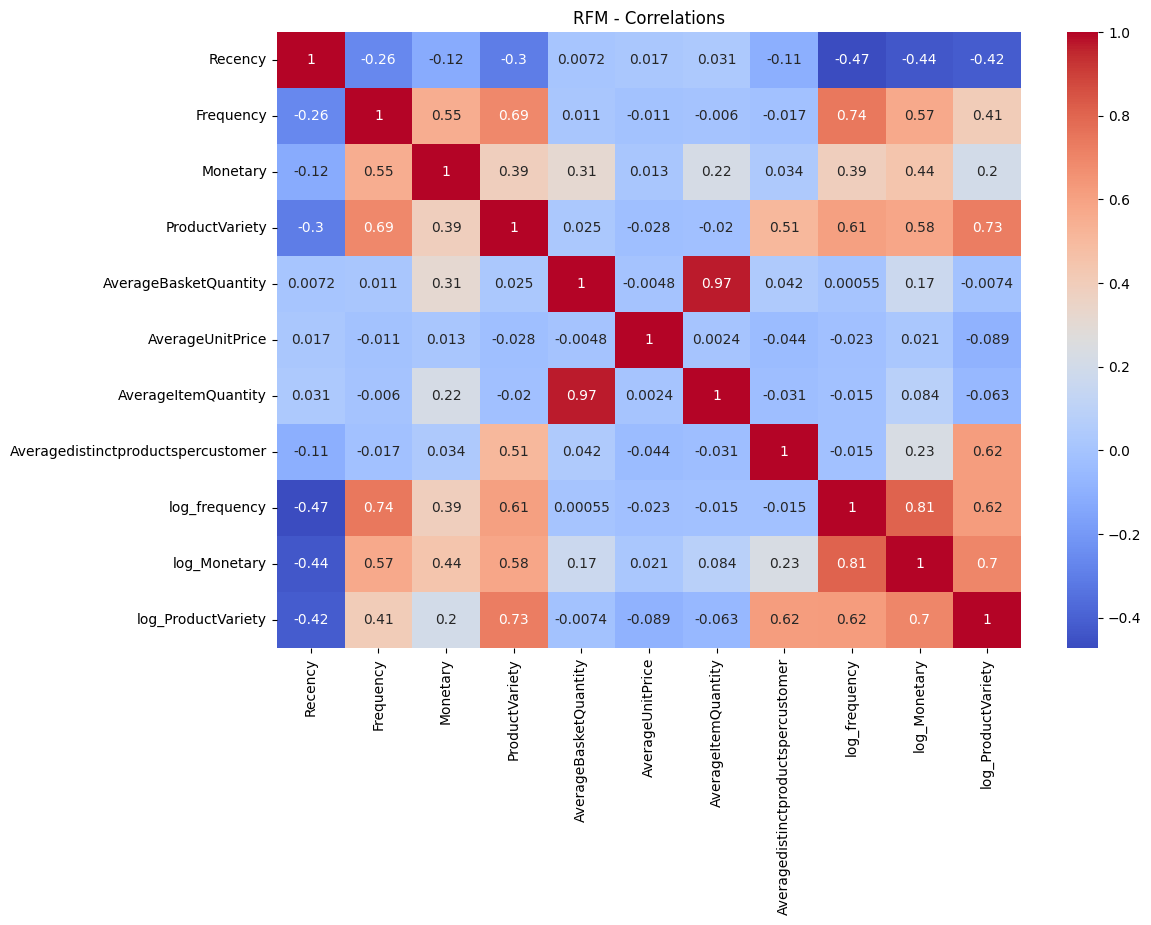

In [42]:
#Correlation Map

plt.figure(figsize=(12,8))
sns.heatmap(rfm.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("RFM - Correlations")
plt.show()

**Interpretation of HeatMap:**

Highly correlated features (AverageBasketQuantity) and (AverageItemQuantity) have correlation 0.97

The log transformed features have strong relationship with their originals , confirming they are mathematically consistent.

Frequency vs Monetary has moderate positive relationship which means more frequent buyers tend to spend more.

# **Feature Scaling:**

**Data Preprocessing (Stage 2):**

Standard scalar should be applied to all the features to make all the variables have a mean of 0 and variance of 1 . Country column is categorical.So, it should be changed to numbers and one hot encoding should be done.

In [43]:

num_features = ['Recency','log_frequency','log_Monetary','log_ProductVariety','AverageBasketQuantity','AverageUnitPrice','AverageItemQuantity','Averagedistinctproductspercustomer']
cat_features = ['Country']

#Preprocessing pipeline

pre = ColumnTransformer(transformers=[("num",StandardScaler(),num_features),
                                      ("cat",OneHotEncoder(handle_unknown="ignore",sparse_output=False),cat_features)],
                                      remainder="drop"  )

#Fit+Transform

X = pre.fit_transform(rfm)

#Build Feature names

num_out = [f"sc_{c}" for c in num_features]
cat_out = list(pre.named_transformers_['cat'].get_feature_names_out(cat_features))
feature_names = num_out + cat_out

#Final dataframe

X_scaled = pd.DataFrame(X,columns=feature_names)
print("X_scaled shape:",X_scaled.shape)

X_scaled shape: (4338, 45)


# **Unsupervised Learning Techniques:**

## **1.Dimensionality Reduction - PCA and UMAP**



*   Dimensionality reduction reduces the numer of features while keeping as much information as possible.
*   It helps to remove noise and redundant/Correlated features.
*   Since the dataset has more features due to one-hot encoding of countries,this technique simplifies the data for visualization or furthur modelling.


**Principal Component Analysis(PCA):**

PCA1 and PCA2 total variance: 0.5956586805548374


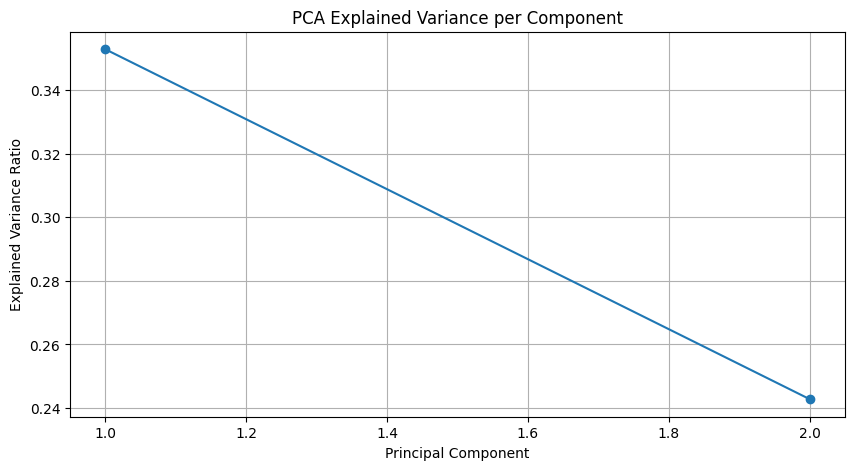

In [44]:
#Principal Component Analysis (PCA) is used to reduce the dataframe to 2 PCs.
#PC1 and PC2 captures ~62% of the total variance.

#Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Explained Variance
explained_var =  pca.explained_variance_ratio_.sum()
print('PCA1 and PCA2 total variance:', explained_var)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title("PCA Explained Variance per Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


In [45]:
#UMAP
import umap

X_umap = umap.UMAP(n_neighbors = 15,min_dist = 0.1,n_components=2,random_state=42)
X_umap = X_umap.fit_transform(X_scaled)

#umap_df = pd.DataFrame(X_umap,columns=["UMAP1","UMAP2"])

# **2.Clustering Algorithms: (Segmentation) and Hyperparameter Tuning**

**1.K-Means:**

- Using Elbow method, find the optimal k value.
- Fit the scaled data with optimal k value in kmeans algorithm
- Calculate Silhouette and DB score
- Visulaize the Clusters using PCA and UMAP Projection

#Elbow Method - KMeans

Elbow method is used to find the optimal value of k in k-means clustering algorithm.We are finding the number of clusters for different values of k.
k ranges from 2 to 30.

Approximate optimal k: 3


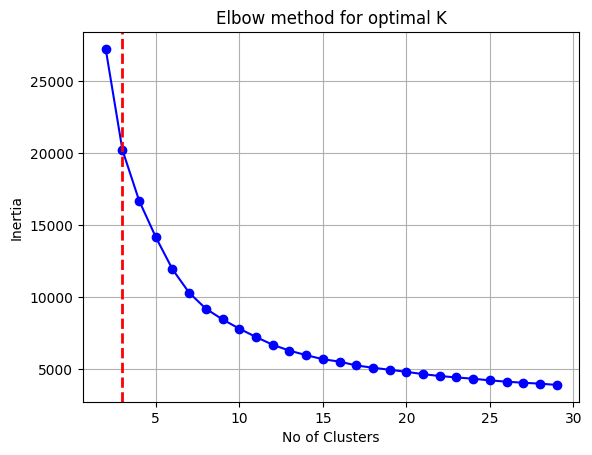

In [46]:
#Modelling - k-means

#Elbow Method is used to determine the optimal value of k for k-means clustering algorithm

inertia = []
K = list(range(2,30))

for k in K:
  kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_) #kmeans.inertia_ returns the inertia(sum od squared distances from the point to centroid) values at different values of k

diffs = np.diff(inertia) ## to check at which point the inertia drops rapidly
diffs_r = np.diff(diffs)
#drop = np.diff(inertia)
#ratio = np.abs(drop) / inertia[:-1]

optimal_k = K[np.argmax(diffs_r)+1]
print("Approximate optimal k:", optimal_k)

plt.plot(K,inertia,'bo-')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.axvline(x=optimal_k,color='red',linestyle='--',linewidth=2)
plt.grid(True)
plt.show()

Based on the elbow method, k = 3 is optimal value.The curve shows a sharp drop in inertia from k=2 to k=3 which means clustering improves significantly.

After k=3, the curve flattens, which is the elbow shape.

In [50]:
#Hyperparameter Tuning - Calculate Silhouette score for different clusters

scores = {}
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  labels = kmeans.fit_predict(X_scaled)
  score = silhouette_score(X_scaled,labels)
  scores[k] = score

for i,j in scores.items():
  print(i,j)

2 0.32029649268690313
3 0.32142239788983323
4 0.24390743795155156
5 0.2859790301395121
6 0.25229352630157864
7 0.2521072841329369
8 0.2257886519591893
9 0.22974605380387703
10 0.22219822076764686


From the above values, we can see that for k=3 , the Silhouette score is highest.K=3, the score is 0.3214 (very small difference between k = 2 and k=3)

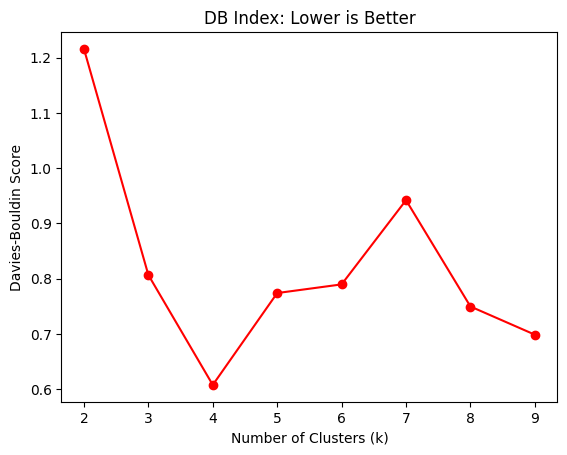

Optimal K according to DB Score: 4


In [52]:

db_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Calculate DB Score
    score = davies_bouldin_score(X_scaled, labels)
    db_scores.append(score)

# Plotting the results
plt.plot(K, db_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('DB Index: Lower is Better')
plt.show()

# Find the k with the minimum score
optimal_k_db = K[db_scores.index(min(db_scores))]
print(f"Optimal K according to DB Score: {optimal_k_db}")

**Interpretation:**

k value found using:



1.   Elbow Method (k=3)

1.   Silhouette Score (for k=3 , score = 0.32142239788983323)
2.   DB Score (for k=4 , according to the plot above )

According to elbow method, the optimal value of k is 3 which means k from 2 to 3 shows an improvement in cluster compactness.Beyond k=3,adding more clusters still improves but at a very small rate.

Silhouette score suggests that k=3 is the optimal.Silhouette score is highest for k=3 when found by calculating the scores for k = 2 to 10

DB score calculates how compact/far part the clusters are.Because DB score is a loss function,low DB means the clusters are compact and well separated.The score is lowest for k=4.

Baesd on the above 3 criteria, since elbow method matches with Silhouette score, k=3 is preferred for this dataset.

In [53]:
#Fit k-means with optimal k

kmeans = KMeans(n_clusters=3,random_state=42)
labels = kmeans.fit_predict(X_scaled)
rfm['k_Cluster'] = labels

#Calculate Silhouette Score

from sklearn.metrics import silhouette_score

k_score = silhouette_score(X_scaled,labels)
print(f'Silhouette Score for k=3 is {k_score:.4f}')

Silhouette Score for k=3 is 0.3214


Silhouette score for optimal value of k=3 is 0.3214

In [54]:
# Group by cluster and calculate mean RFM values
rfm_summary = rfm.groupby('k_Cluster').agg({'Recency': 'mean','Frequency': 'mean','Monetary': 'mean'})

# Add number of customers under each cluster
rfm_summary['Num_Customers'] = rfm.groupby('k_Cluster').size()
rfm_summary = rfm_summary.reset_index()

print(rfm_summary)

   k_Cluster     Recency  Frequency      Monetary  Num_Customers
0          0  138.389474   1.611789    448.742418           2375
1          1   36.912334   7.493884   3959.460276           1962
2          2  326.000000   1.000000  77183.600000              1


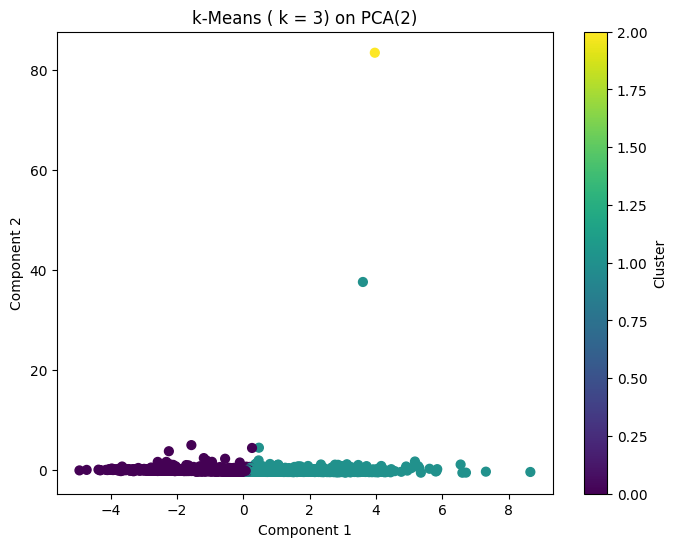

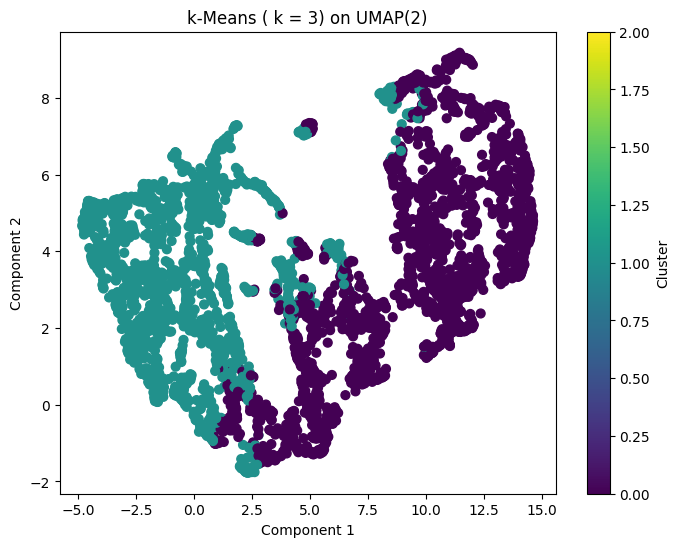

In [55]:
#PCA and UMAP Visualization for k=3 Clusters

def plot_scatter_2d(X, labels, title):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=40)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label="Cluster")
    plt.show()

plot_scatter_2d(X_pca,labels,f"k-Means ( k = 3) on PCA(2)")
plot_scatter_2d(X_umap,labels,f"k-Means ( k = 3) on UMAP(2)")

**k-means Summary:**



1.   Found the number of clusters using elbow method
2.   Calculated the Silhouette score and DB score and found the value of k as 3


1.   Applied k-means clustering algorithm on k=3
2.   Maximum number of customers belong to Cluster 0 and Cluster 1 .

1.   Cluster 2 is an outlier.Has only 1 Customer.
2.   k-means with k=3 is visualized on PCA and UMAP

1.   PCA captures ~ 59% of Variance
2.   All the data points lie on the axis flat and there is no clear linear separation.

1.   UMAP is suitable for visualizing non linear patterns and we can see dense clusters.
2.   The separation in the plot highlights meaningful behavioral differences.Only 2 clusters are visible and they are overlapping too.










In general, it is better to classify them according to k-means k-means finds natural patterns based on their distances and it classifies the data points based on their location without the labels.Clusters reflect the actual dataset.

**DBSCAN:** (Density Based Spatial Clustering of Applications with Noise)

1.   DBSCAN finds clusters based on the density of data points and is excellent at flaggging outliers.
2.   Unlike k-means, DBSCAN doesn't require to mention the number of clusters.





**Hyper parameter Tuning :**

To find the optimal value of eps and min_samples we tried different values of eps and min_samples and calculated the Silhouetter score.

In [56]:
#Hyperparameter Tuning [eps,min_samples]
#eps - Maximum distance between 2 points for them to be considered neighbors
#min_samples - the minimum number of points required to form a core point

for eps in [0.3,0.5,0.7,1.0]:
  for min_samples in [3,5,10,15]:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels_db = db.fit_predict(X_scaled)
    rfm['DBSCAN_Cluster'] = labels_db
    n_clusters = len(set(labels_db)) - (1 if -1 in labels else 0)
# Only compute silhouette if >1 cluster
    if n_clusters > 1:
      db_score = silhouette_score(X_scaled, labels_db)
      print(f"DBSCAN Silhouette Score: for {eps} and {min_samples} is {db_score:.4f}")
    else:
      print(f"eps={eps}, min_samples={min_samples} -> only {n_clusters} cluster(s)")

DBSCAN Silhouette Score: for 0.3 and 3 is -0.4235
DBSCAN Silhouette Score: for 0.3 and 5 is -0.4100
DBSCAN Silhouette Score: for 0.3 and 10 is -0.3387
DBSCAN Silhouette Score: for 0.3 and 15 is -0.3100
DBSCAN Silhouette Score: for 0.5 and 3 is -0.3018
DBSCAN Silhouette Score: for 0.5 and 5 is -0.2127
DBSCAN Silhouette Score: for 0.5 and 10 is 0.0656
DBSCAN Silhouette Score: for 0.5 and 15 is 0.0071
DBSCAN Silhouette Score: for 0.7 and 3 is -0.3219
DBSCAN Silhouette Score: for 0.7 and 5 is -0.2309
DBSCAN Silhouette Score: for 0.7 and 10 is -0.0804
DBSCAN Silhouette Score: for 0.7 and 15 is 0.2499
DBSCAN Silhouette Score: for 1.0 and 3 is -0.2907
DBSCAN Silhouette Score: for 1.0 and 5 is -0.1178
DBSCAN Silhouette Score: for 1.0 and 10 is 0.0074
DBSCAN Silhouette Score: for 1.0 and 15 is -0.0818




*   The below code computes the distance to each point's 5th nearest neighbor(k=5) and sorts those distances to form k-distance curve.
* Using Kneelocator, we can find the point where there is a sharp rise and find the optimal values of eps.


*   This is marked in the plot with a red line.






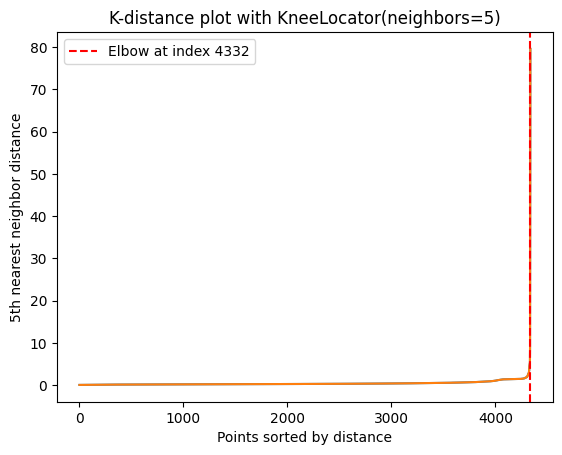

Optimal eps estimated by KneeLocator: 5.3538


In [57]:
#Plot k-distance curve:
!pip install kneed

from kneed import KneeLocator
k=5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, k-1])  # 5th nearest neighbor
kneedle = KneeLocator(range(len(distances)), distances,curve="convex", direction="increasing")

optimal_eps = distances[kneedle.knee]
plt.plot(distances)
plt.plot(distances)
plt.axvline(kneedle.knee, color='r', linestyle='--', label=f'Elbow at index {kneedle.knee}')
plt.title("K-distance plot with KneeLocator(neighbors=5)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}th nearest neighbor distance")
plt.legend()
plt.show()

print(f"Optimal eps estimated by KneeLocator: {optimal_eps:.4f}")

1.   In the above plot, k stays flat and then rises sharply at a point.
2.   Select the point where there is a steep raise



Now the optimal eps vlue = 5.3538.Implement this in DBSCAN and find the silhouette score.

In [58]:
db = DBSCAN(eps=optimal_eps, min_samples=min_samples)
labels_db = db.fit_predict(X_scaled)
rfm['DBSCAN_Cluster1'] = labels_db
n_clusters = len(set(labels_db)) - (1 if -1 in labels else 0)
# Only compute silhouette if >1 cluster
if n_clusters > 1:
  db_score = silhouette_score(X_scaled, labels_db)
  print(f"DBSCAN Silhouette Score: for {optimal_eps} and {min_samples} is {db_score:.4f}")
else:
  print(f"eps={optimal_eps}, min_samples={min_samples} -> only {n_clusters} cluster(s)")

DBSCAN Silhouette Score: for 5.353775994020733 and 15 is 0.9052


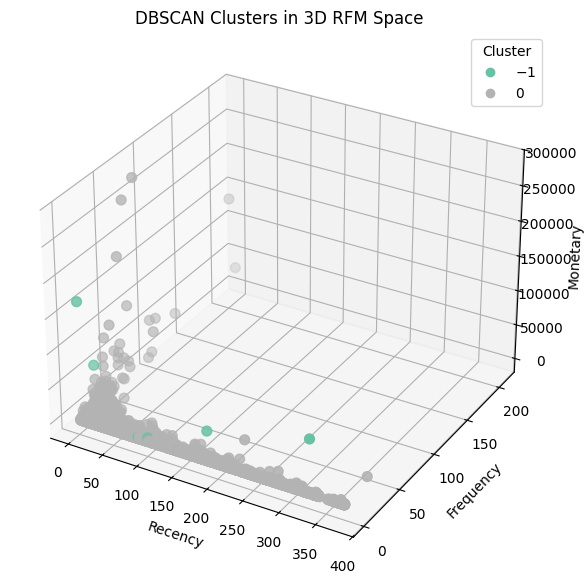

In [59]:
#DBSCAN Visualisation:
# Create 3D scatter plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['DBSCAN_Cluster1'],
    cmap='Set2',
    s=50
)

# Axis labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title("DBSCAN Clusters in 3D RFM Space")

# Legend
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

*   In DBSCAN Clustering results,outliers are the data points labelled as -1.
*   These are the customers whose RFM behavior doesn't fit into any of the dense clusters DBSCAN identified.

*   We can see that only outliers and 1 cluster is formed and that is the reason why Silhouette score is very high.
*  This means that DBSCAN didn't predict useful customer segments and only a dense group is formed.





# DBSCAN Visualisation using PCA and UMAP

Silhouette score (PCA) 0.9673443591250787


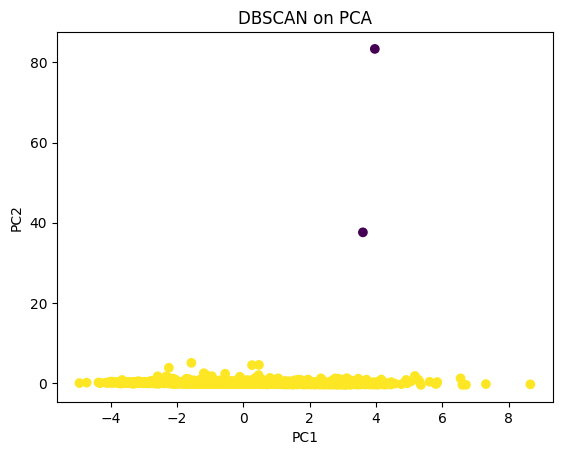

Silhouette score (UMAP) -0.073282786


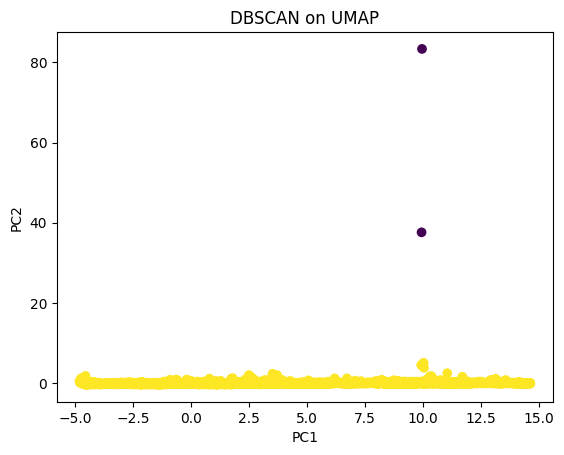

In [60]:
#PCA - DBSCAN

db_pca_umap = DBSCAN(eps=5.353775994020733,min_samples=15)
labels_pca_umap = db_pca_umap.fit_predict(X_pca)

if len(set(labels_pca_umap))>1:
  print("Silhouette score (PCA)",silhouette_score(X_pca,labels_pca_umap))
else:
  print("Only one cluster found in PCA space  ")

plt.scatter(X_pca[:,0],X_pca[:,1],c=labels_pca_umap,cmap='viridis')
plt.title('DBSCAN on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#PCA - UMAP
if len(set(labels_pca_umap))>1:
  print("Silhouette score (UMAP)",silhouette_score(X_umap,labels_pca_umap))
else:
  print("Only one cluster found in PCA space  ")

plt.scatter(X_umap[:,0],X_pca[:,1],c=labels_pca_umap,cmap='viridis')
plt.title('DBSCAN on UMAP')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


DBSCAN on PCA plot shows one dominant cluster and 2 clear outliers.Silhouette score is very high ~0.97 which is too high and all are grouped as a single cluster.

DBSCAN on UMAP plot shows that clustering is weak and overlapping and has a very low silhouette score ~-0.07 which indicates poor separation.

Thus,DBSCAN doesnt do the clustering properly and k-means with 3 clusters is better so far.

**Hierarchical Clustering (Agglomerative):**

In [61]:
#Normalization makes the clustering algorith work better

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [62]:
#Reduce the dimensionality of the data using PCA

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']

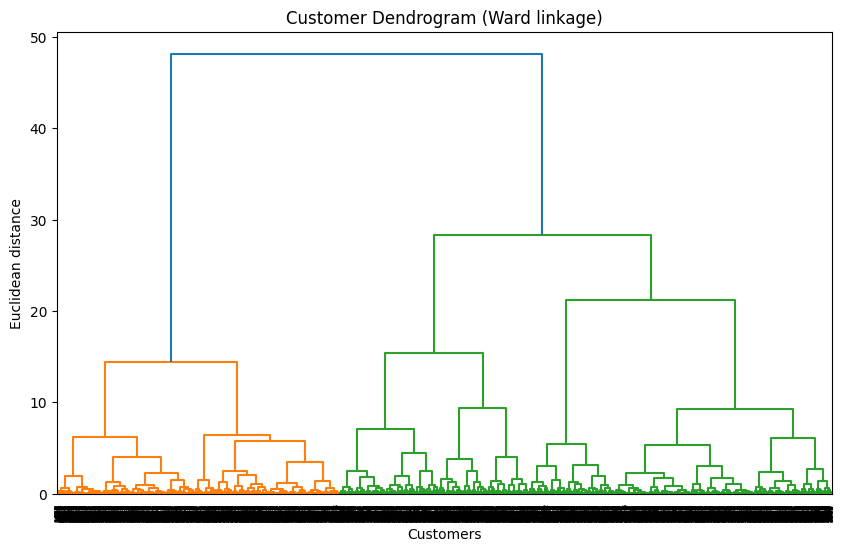

In [63]:
# Step 1: Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_principal, method='ward'))
plt.title("Customer Dendrogram (Ward linkage)")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()


Based on the visual selection of this denodram,the most significant groupings are



1.   3-Cluster Selection - Horizontal cut is at the ecludian distance of 35 (One orange and 2 green)

-The line will intersect the three major branches: the large blue branch on the left, and the two large green branches in the center and right.

-This is typically the most desired solution as it represents the most distinct, high-level groups.

2.   4-Cluster Selection - Horizontal cut is at the ecludian distance of 20 (1 Orange and 2 Green)

-The line will intersect four major branches: the tall blue branch, the tall orange branch, and the two main green branches.

-This solution provides slightly finer segmentation.

3. 2 -Cluster selection Cutting at height 40 will give 2 clusters.

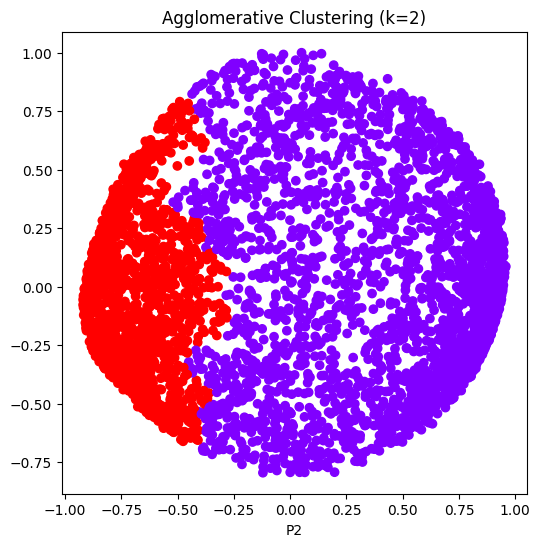

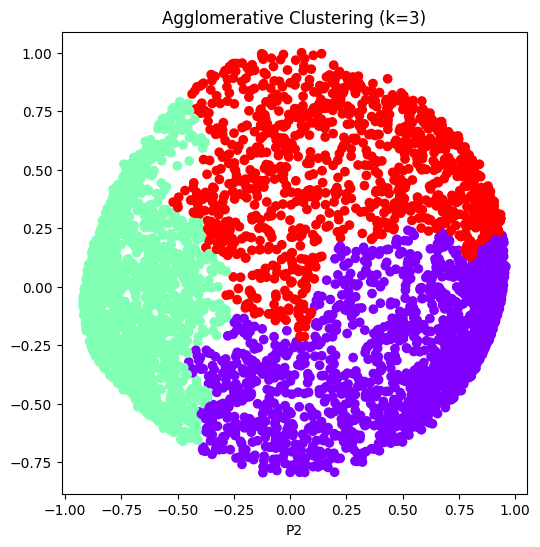

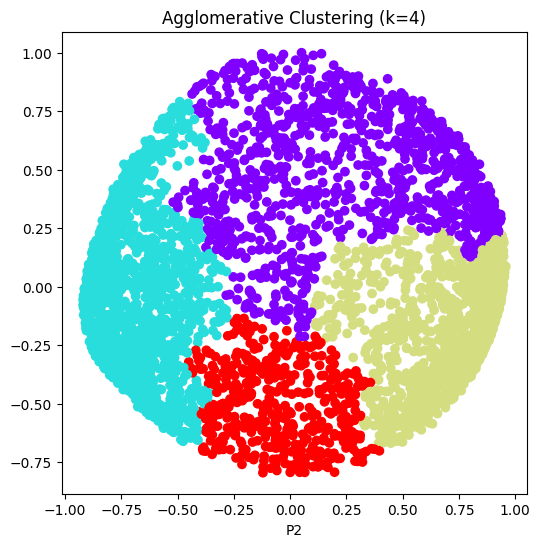

In [64]:
#Step 2: Apply agglomerative clusters for different values of k

for k in range(2,5):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X_principal)

  plt.figure(figsize=(6,6))
  plt.scatter(X_principal['P1'],X_principal['P2'],c=labels,cmap='rainbow')
  plt.title(f'Agglomerative Clustering (k={k})')
  plt.xlabel('P1')
  plt.xlabel('P2')
  plt.show()


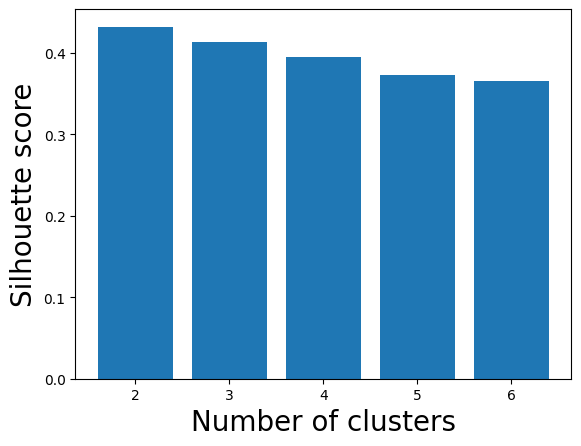

In [65]:
#Evaluate Models and Visulaize Results

k = [2,3,4,5,6]

ac2 = AgglomerativeClustering(n_clusters=2)
ac3 = AgglomerativeClustering(n_clusters=3)
ac4 = AgglomerativeClustering(n_clusters=4)
ac5 = AgglomerativeClustering(n_clusters=5)
ac6 = AgglomerativeClustering(n_clusters=6)

silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal,ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal,ac3.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal,ac4.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal,ac5.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal,ac6.fit_predict(X_principal)))
plt.bar(k,silhouette_scores)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Silhouette score',fontsize=20)
plt.show()

Based on the above plot, we can conclude that k=2 gives the maximum silhouette score.When this is compared with the scatter plot above, we can see that majority of the data is grouped as 1 cluster and all the other remaning data in another.

Both k-means and agglomerative clustering gives almost the same value.

But for k=2, its will be a very coarse segmentation "High value" or "Low value"customers.

For k=3,There will be granular segmentation and they provide richer segmentations. (Higg/Medium and Low)

Selection of clusters depends purely on the business needs.For a simple split, we can choose k=2 and for granular segmentation we choose k=3

For this dataset,since the silhouette score for k-means and Agglomerative clustering is very close ~0.4, I will choose k=3 for detailed customer segmentation for marketing strategies.

# GMM Clustering

Unlike k-means clustering where a point belongs to either cluster A or Cluster B , GMM clustering means the data point belongs to either or all of the clusters.For example, a data point might have the probability of belonging to 70% of cluster A and 30% of cluster B.There will be not just speherical clusters also elliptical.

**Hyperparameter Tuning **

In GMM, we can tune parameters like the Covariance(spread of the data) type =['full','tied','diag','spherical'] and n_components (number of clusters the model will try to fit the data)

In the below code, BIC(how well the model fits the data and how simple the model is) and Silhouette score is calculated for diffreent combinations and values of cov_types and n_components.

In [67]:


cov_types = ['full','tied','diag','spherical']
n_component_list = [2,3,4,5]

results = []
bic_scores = []
best_score=-1
best_model = None
best_labels = None
best_cfg = None

for cov in cov_types:
  for n in n_component_list:
    gmm = GaussianMixture(n_components=n,covariance_type=cov,random_state=42)
    labels_gmm = gmm.fit_predict(X_scaled)

    bic = gmm.bic(X_scaled)
    bic_scores.append((cov,n,bic))
    print(f"cov = {cov},k={n},BIC = {bic}")

    if len(np.unique(labels_gmm)) > 1:
      sil = silhouette_score(X_scaled, labels_gmm)
      results.append((cov, n, sil))

      if sil > best_score:
        best_score = sil
        best_model = gmm
        best_labels = labels_gmm
        best_cfg = (cov, n)

results_df = pd.DataFrame(results, columns=['covariance_type', 'n_components', 'silhouette'])
bic_df = pd.DataFrame(bic_scores, columns=['covariance_type', 'n_components', 'bic'])

print("\nSilhouette Results:")
print(results_df.sort_values('silhouette', ascending=False))

print("\nBIC Results:")
print(bic_df.sort_values('bic', ascending=False))

print(f"\nBest GMM: cov={best_cfg[0]}, n_components={best_cfg[1]}, silhouette={best_score:.8f}")


cov = full,k=2,BIC = -1258312.896373479
cov = full,k=3,BIC = -1181148.2546681897
cov = full,k=4,BIC = -1485971.8998122003
cov = full,k=5,BIC = -1627800.8241795206
cov = tied,k=2,BIC = -597118.2814330321
cov = tied,k=3,BIC = -613465.9258627223
cov = tied,k=4,BIC = -586922.2200193347
cov = tied,k=5,BIC = -650034.0858892143
cov = diag,k=2,BIC = -1218391.826844171
cov = diag,k=3,BIC = -1219226.6527679937
cov = diag,k=4,BIC = -1419983.5819105206
cov = diag,k=5,BIC = -1609485.2222905906
cov = spherical,k=2,BIC = 121430.05397892397
cov = spherical,k=3,BIC = 103710.02090185235
cov = spherical,k=4,BIC = 26837.148590137513
cov = spherical,k=5,BIC = -15438.938992222927

Silhouette Results:
   covariance_type  n_components  silhouette
4             tied             2    0.386807
12       spherical             2    0.316980
1             full             3    0.313477
14       spherical             4    0.265846
13       spherical             3    0.260147
15       spherical             5    0.2432

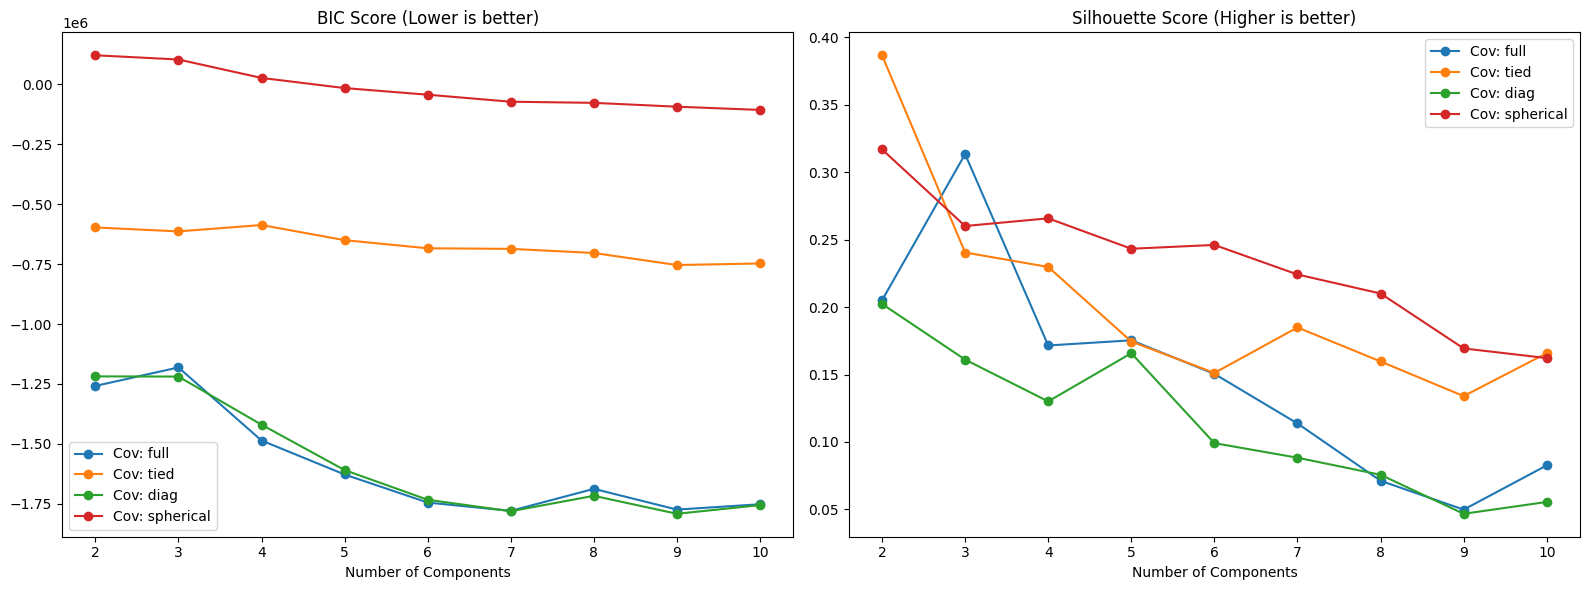

In [69]:
#GMM Hyperparameter Tuning

cov_types = ['full','tied','diag','spherical']
n_component_list = [2,3,4,5,6,7,8,9,10]

bic_results = {cov: [] for cov in cov_types}
sil_results = {cov: [] for cov in cov_types}

for cov in cov_types:
  for n in n_component_list:
    gmm = GaussianMixture(n_components=n,covariance_type=cov,random_state=42)
    labels_gmm = gmm.fit_predict(X_scaled)

    bic_results[cov].append(gmm.bic(X_scaled))
    sil_results[cov].append(silhouette_score(X_scaled, labels_gmm))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for cov in cov_types:
    # BIC Plot (Lower is better)
    ax[0].plot(n_component_list, bic_results[cov], label=f'Cov: {cov}', marker='o')
    # Silhouette Plot (Higher is better)
    ax[1].plot(n_component_list, sil_results[cov], label=f'Cov: {cov}', marker='o')

ax[0].set_title('BIC Score (Lower is better)')
ax[0].set_xlabel('Number of Components')
ax[0].legend()

ax[1].set_title('Silhouette Score (Higher is better)')
ax[1].set_xlabel('Number of Components')
ax[1].legend()

plt.tight_layout()
plt.show()

**Analysis:**

**BIC Score:**

Best BIC Score: cov_type = diag,n_components = 9

Covariance type 'Full' and 'diag' gives lower BIC score after k=4.Tied and Spherical have higher BIC scores which means they oversimplify the cluster shapes.

**Silhouette Score:**

Best Silhouette score: cov_type = tied,n_components = 2

Silhouette scores are modest overall peaking around 0.35-0.38 for both cov_type (tied and full) for k = 2 and 3

From GMM we can conclude that ,based on the silhouette score for best separation and interoporability, we can take k=2 or 3. Since all the earlier models coincide with k=3, I will choose the number of clusters as 3 for better segmenattion.


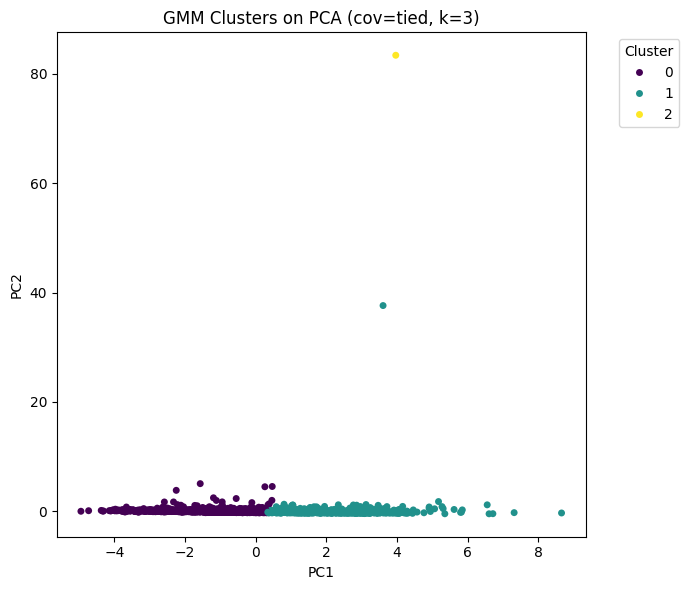

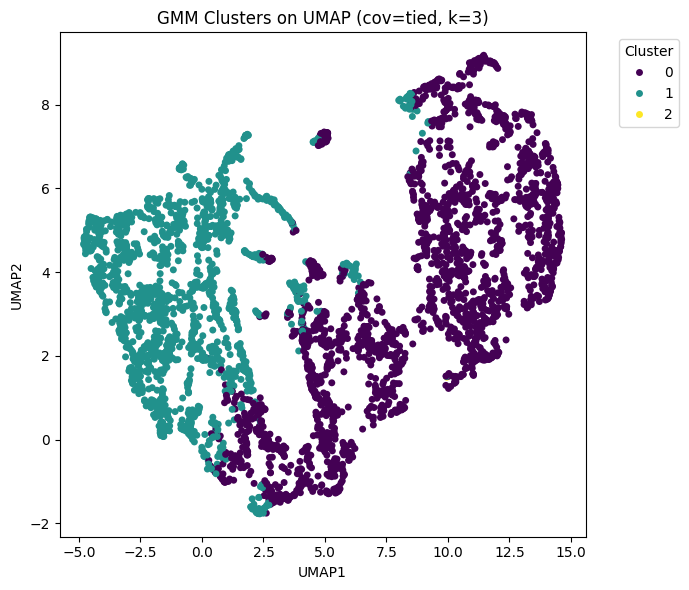

In [70]:
#GMM Visualization on PCA

import matplotlib.pyplot as plt
import seaborn as sns

gmm_pca_umap = GaussianMixture(n_components=3,covariance_type='tied',random_state=42)
gmm_labels_pca_umap = gmm_pca_umap.fit_predict(X_pca)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=gmm_labels_pca_umap, palette='viridis', s=25, linewidth=0)

plt.title(f"GMM Clusters on PCA (cov={best_cfg[0]}, k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#GMM Visualization on UMAP

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=gmm_labels_pca_umap, palette='viridis', s=25, linewidth=0)

plt.title(f"GMM Clusters on UMAP (cov={best_cfg[0]}, k=3)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# HDBSCAN:

When the dataset has overlapping or uneven densities,HDBSCAN outperforms DBSCAN and produces more stable clusters.It is better at noise handling.No need to tune eps manually.

In [72]:


#By increasing the min_samples to 20, we get noise percentage as 36%

clusterer = hdbscan.HDBSCAN(min_cluster_size=50,min_samples=15,metric='euclidean')
labels_hdb = clusterer.fit_predict(X_scaled)
print(np.unique(labels_hdb))
n_clusters = len(set(labels_hdb)) - (1 if -1 in labels_hdb else 0)
noise_pct = list(labels_hdb).count(-1) / len(labels_hdb)

print("Clusters found:", n_clusters)
print("Noise percentage:", round(noise_pct * 100, 2), "%")

if n_clusters > 1:
    sil = silhouette_score(X_scaled, labels_hdb)
    print("Silhouette score:", sil)
else:
    print("Silhouette not meaningful for 1 cluster")

[-1  0  1]
Clusters found: 2
Noise percentage: 9.24 %
Silhouette score: 0.008105414274281547


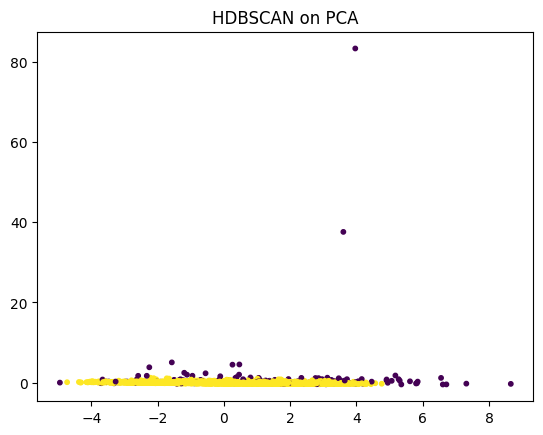

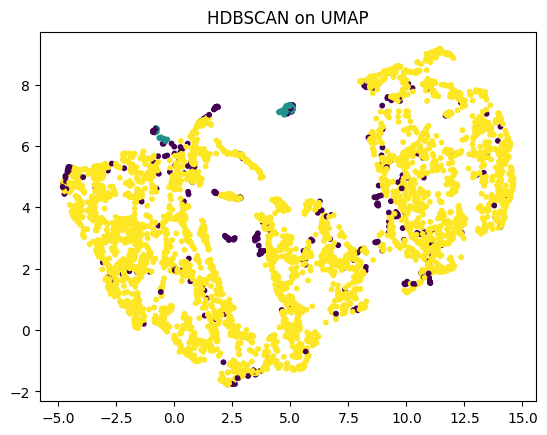

In [73]:
#HDBSCAN Visualization on PCA and UMAP

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_hdb, cmap='viridis', s=10)
plt.title("HDBSCAN on PCA")
plt.show()

plt.scatter(X_umap[:,0], X_umap[:,1], c=labels_hdb, cmap='viridis', s=10)
plt.title("HDBSCAN on UMAP")
plt.show()

**Analysis:**

Clusters [-1,0,1] are formed . -1 is the noise. so only 2 clusters are formed.

Noise percentage is low (9%)

Silhouette score: 0.08 which is very low.

Very low silhouette score shows poorly separated clusters which can be clearly visible in UMAP.Clusters are overlapping.This cannot be considered.

# Conclusion:

The following Clustering algorithms were used & PCA and UMAP is used to visualize the clusters.

a)**K-means **- Baesd on the silhouette score and elbow method, we found the clusters as 3.

b)**DBSCAN:** Gave 2 clusters 0 and -1 . -1 refers to outliers, so it should be ignored. All the customers are grouped into a single cluster which is wrong and it can be ignored since there is no segmenattion.

c)**Hierarchical Clustering:** Used Agglomerative Clustering which is a bottom up approach. Since there is very minute difference between k=2 and k=3, I chose k=3 based on k-means and for better segmentation.

d)**GMM:** Silhouette scores are modest overall peaking around 0.35-0.38 for both cov_type (tied and full) for k = 2 and 3

From GMM we can conclude that ,based on the silhouette score for best separation and interoporability, we can take k=2 or 3.

e)**HDBSCAN:** Silhouette score is very low, we can ignore this model.

From all of the above models, lets consider the total number of clusters as 3.

In [74]:
# Group by cluster and calculate mean RFM values
rfm_summary = rfm.groupby('k_Cluster').agg({'Recency': 'mean','Frequency': 'mean','Monetary': 'mean','ProductVariety':'mean','AverageBasketQuantity':'mean','AverageUnitPrice':'mean','AverageItemQuantity':'mean'})

# Add number of customers under each cluster
rfm_summary['Num_Customers'] = rfm.groupby('k_Cluster').size()
rfm_summary = rfm_summary.reset_index()

print(rfm_summary)

   k_Cluster     Recency  Frequency      Monetary  ProductVariety  \
0          0  138.389474   1.611789    448.742418       20.973895   
1          1   36.912334   7.493884   3959.460276      110.590214   
2          2  326.000000   1.000000  77183.600000        1.000000   

   AverageBasketQuantity  AverageUnitPrice  AverageItemQuantity  Num_Customers  
0             178.155635          5.494693            25.696051           2375  
1             306.959300          3.226434            30.709090           1962  
2           74215.000000          1.040000         74215.000000              1  


**Interpretation:**

**Cluster 0: (At Risk/Inactive Customers)**

Moderate Recency (138)
Very low frequency
Monetary is a bit high (~444)
Large Group Size (2375)

These are less frequent customers/seasonal shoppers who havent returned recently but have less monetary.They might need reactivation ads or can be deprioritized.

**Cluster 1: (Champions/Loyal Customers)**

Very Recent purchase
High Frequency
High Monetary
Large Group Size

These are best customers who have bought items recently and also often.They have spent huge amount on an average.Ideal for loyalty programs and Personalized offers.

**Cluster 2:**

There is only 1 customer and might be an outlier.

In [75]:
#Countries per Cluster

Country = rfm.groupby(["k_Cluster","Country"]).size().groupby(level=0).apply(lambda s:s/s.sum()).unstack(fill_value=0).round(3)
Country.head()

,Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
k_Cluster,k_Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0.002,0.003,0.001,0.003,0.0,0.001,0.002,0.001,0.0,0.001,...,0.000,0.0,0.000,0.006,0.002,0.004,0.001,0.001,0.915,0.001
1,1,0.002,0.001,0.000,0.008,0.0,0.001,0.003,0.002,0.0,0.003,...,0.001,0.0,0.001,0.007,0.002,0.005,0.001,0.000,0.890,0.001
2,2,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


From the above table, we can see that UK dominated both the clusters

Cluster 0: (91%)
Cluster 1: (89%)

In [76]:
map_labels = rfm['k_Cluster'].to_dict()
df_cleaned['cluster'] = df_cleaned['CustomerID'].map(map_labels)

top_products = df_cleaned.groupby(['cluster','Description'])['Revenue'].sum().sort_values(ascending=False).groupby(level=0).head(10).reset_index()
top_products.head(30)


,cluster,Description,Revenue
0,1,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,1,REGENCY CAKESTAND 3 TIER,128440.15
2,1,WHITE HANGING HEART T-LIGHT HOLDER,89810.95
3,2,MEDIUM CERAMIC TOP STORAGE JAR,77183.60
4,1,JUMBO BAG RED RETROSPOT,76474.09
5,1,POSTAGE,67606.61
6,1,PARTY BUNTING,57352.13
7,1,ASSORTED COLOUR BIRD ORNAMENT,49832.73
8,1,RABBIT NIGHT LIGHT,49274.60
9,1,Manual,48829.39


**Analysis:**


1.   Cluster 0 - PICNIC BASKET WICKER 60 PIECES,REGENCY CAKESTAND 3 TIER	,PARTY BUNTING,WHITE HANGING HEART T-LIGHT HOLDER,CHILLI LIGHTS

2.   Cluster 1 - PAPER CRAFT , LITTLE BIRDIE	,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,POSTAGE,PARTY BUNTING

3.   Cluster 2 - MEDIUM CERAMIC TOP STORAGE JAR

Cluster 0 - Decor Items
Cluster 1 belongs to seasonal stuff
Cluster 2 - Outlier




# **Things to Improve:**


1.   Feature engineering enhancements can be done by adding timebased features.
2.   Create Pairwise ratios like (Monetary/Frequency) etc.

1.   Dimensionality reduction techniques like t-SNE can be used.They are good for visualizing small datasets with complex structure.
2.   NMF can be done.

1.   Evalualtion scores like Davies-Bouldin and Calinski-Harabasz score can be caculated.





# **References**



1.   https://medium.com/@hasan.unlu/online-retail-clustering-3bbf860e249b
2.   https://medium.com/@hasan.unlu/online-retail-clustering-3bbf860e249b

3.   https://towardsdatascience.com/market-basket-analysis-with-pandas-246fb8ee10a5/
4.   https://www.geeksforgeeks.org/machine-learning/hdbscan/

5.   https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/
6.   https://www.geeksforgeeks.org/machine-learning/hierarchical-clustering/





